# Edit Allen Mouse CCF (Split to left-right)

## Imports

In [54]:
import numpy as np

import matplotlib.pyplot as plt
import nibabel as nib

## Functions

In [55]:
def show_slice(data: np.ndarray, idx: int, title: str = "", cmap='gray', figsize=(10, 5),
               xline=None) -> None:
    """
    Show a slice of the data.
    
    Parameters:
    - data: The processed data.
    - idx: The index of the slice to show.
    - title: The title for the plot.
    """
    f = plt.figure(figsize=figsize)
    plt.imshow(data[idx, :, :], cmap=cmap)
    plt.title(title)
    if xline is not None:
        plt.axvline(x=xline, color='black', linestyle='--', linewidth=1, label=f'x={xline}')
    plt.show()
    f.clear()
    plt.close(f)


def show_2_slices(data1: np.ndarray, idx1: int, segmentation1: np.ndarray, 
                  data2: np.ndarray, idx2: int, segmentation2: np.ndarray = None,
                  cmap1="gray", cmap2="gray",
                  title1: str = "", title2: str = "") -> None:
    """
    Show two slices of the data and segmentation.
    
    Parameters:
    - data: The processed data.
    - segmentation: The segmentation mask.
    - original_data: The original data.
    - idx: The index of the slice to show.
    - title: The title for the plot.
    """
    f, ax = plt.subplots(1, 2, figsize=(20, 10))
    # Original slice
    ax[0].imshow(data1[idx1, :, :], cmap=cmap1)
    if segmentation1 is not None:
        ax[0].contour(segmentation1[idx1, :, :], levels=[0.5], colors='r')
    ax[0].set_title(title1)
    # Processed slice
    ax[1].imshow(data2[idx2, :, :], cmap=cmap2)
    if segmentation2 is not None:
        ax[1].contour(segmentation2[idx2, :, :], levels=[0.5], colors='r')
    ax[1].set_title(title2)
    plt.show()
    f.clear()
    plt.close(f)
    
    
def show_3_slices(data1: np.ndarray, idx1: int, segmentation1: np.ndarray, 
                  data2: np.ndarray, idx2: int, 
                  data3: np.ndarray, idx3: int,
                  title1: str = "", title2: str = "", title3: str = "") -> None:
    """
    Show three slices of the data and segmentation.
    
    Parameters:
    - data: The processed data.
    - segmentation: The segmentation mask.
    - original_data: The original data.
    - idx: The index of the slice to show.
    - title: The title for the plot.
    """
    f, ax = plt.subplots(1, 3, figsize=(20, 10))
    # Original slice
    ax[0].imshow(data1[idx1, :, :], cmap='gray')
    ax[0].contour(segmentation1[idx1, :, :], levels=[0.5], colors='r')
    ax[0].set_title(title1)
    # Processed slice
    ax[1].imshow(data2[idx2, :, :], cmap='gray')
    ax[1].set_title(title2)
    # Atlas color segmentation
    ax[2].imshow(data3[idx3, :, :])
    ax[2].set_title(title3)
    plt.show()
    f.clear()
    plt.close(f)

## Load data

In [56]:
ccf_filepath = "../../CCF_DATA/annotation_25.nii.gz"

In [70]:
annotation_nib = nib.load(ccf_filepath)
annotation = annotation_nib.get_fdata()
midline = annotation.shape[2] // 2 - 1
offset = int(np.max(annotation))

print("Shape of annotation: ", annotation.shape)
print("Data type: ", annotation.dtype)
print("Number of unique values: ", len(np.unique(annotation)))
print("Minimum label: ", np.min(annotation))
print("Maximum label: ", np.max(annotation))
print("Midline value: ", midline)

Shape of annotation:  (528, 320, 456)
Data type:  float64
Number of unique values:  672
Minimum label:  0.0
Maximum label:  1327.0
Midline value:  227


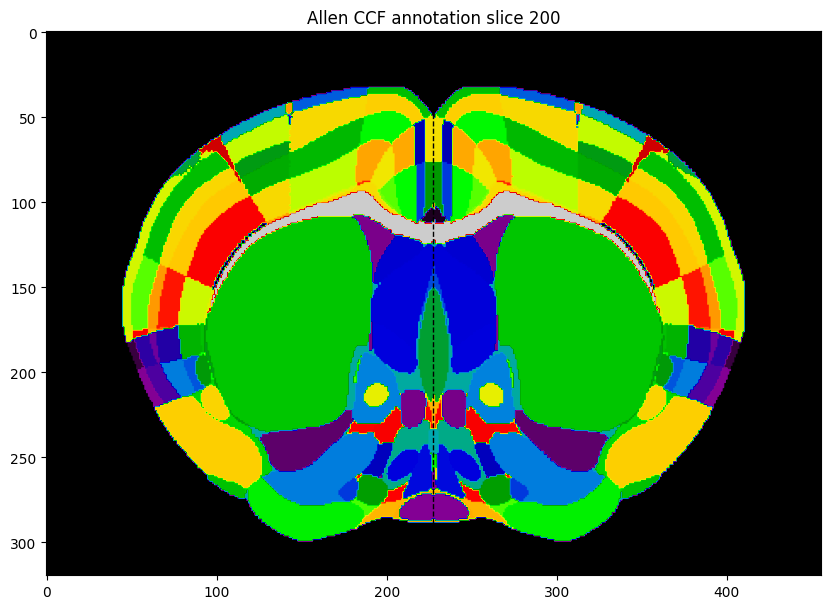

In [68]:
# Index of the slice to show
idx = 200

show_slice(annotation, idx, f"Allen CCF annotation slice {idx}", cmap='nipy_spectral',
           xline=midline, figsize=(10, 10))

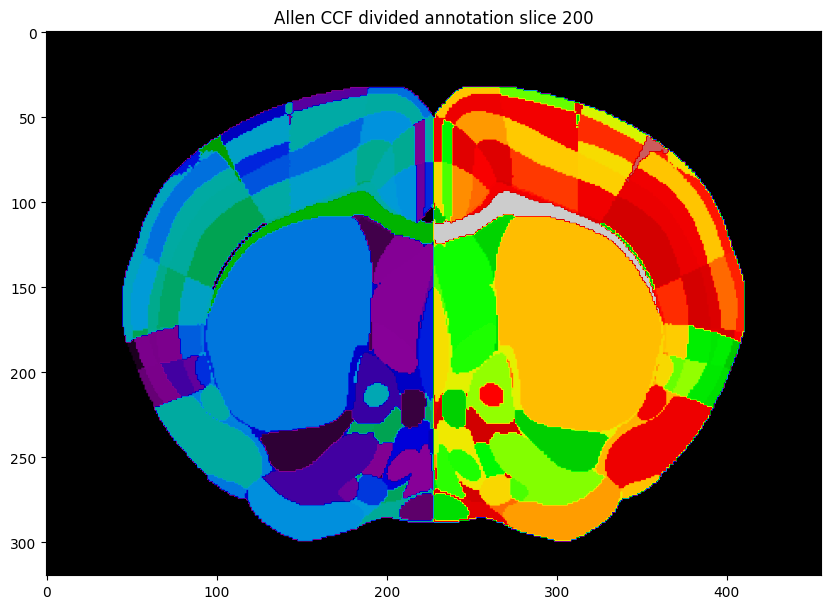

In [69]:
# Split in half and create new labels by offset values

# For every value in the annotation, if its location is to the right of the midline, add 1328 to it
annotation_right = annotation.copy()
annotation_right[:, :, midline + 1:][annotation_right[:, :, midline + 1:] != 0] += offset  # Increase values only for pixels to the right of the midline

show_slice(annotation_right, idx, f"Allen CCF divided annotation slice {idx}", cmap='nipy_spectral',
           xline=None, figsize=(10, 10))

## Save edit to new file

In [71]:
# Get the data and header from the original file
original_affine = annotation_nib.affine
original_header = annotation_nib.header

# Modify the data (e.g., annotation_right is your modified data)
modified_data = annotation_right

# Create a new NIfTI image with the modified data and the original parameters
new_nifti = nib.Nifti1Image(modified_data, affine=original_affine, header=original_header)

# Save the new NIfTI file
nib.save(new_nifti, "annotation_25_leftright.nii.gz")